# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import ow_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"City count: {len(cities)}")

City count: 624


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
## Set OpenWeather API base url
ow_url = "http://api.openweathermap.org/data/2.5/weather?q="
## Set Units
units = "imperial"

## Create weather data empty list
weather_data = []
## Set initial values
record = 1

## Print Log Header
print("Beginning Data Retrieval")
print("------------------------------")

for city in cities:
        ##
        query_url = f"{ow_url}{city}&appid={ow_key}&units={units}"
        response = requests.get(query_url).json()
        try:
            ## Print Log Status
            print(f"Processing Record {record:>2d} | City Id = {response['id']:<7d} [{city}]")
            ## Retrieve weather data from OpenWeather API (response)
            weather_data.append({
                'City': response['name'],
                'Lat': response['coord']['lat'],
                'Lng': response['coord']['lon'],
                'Max Temp': response['main']['temp_max'],
                'Humidity': response['main']['humidity'],
                'Cloudiness': response['clouds']['all'],
                'Wind Speed': response['wind']['speed'],
                'Country': response['sys']['country'],
                'Date': response['dt']
            })
            ## Record counter
            record += 1
        except KeyError:
            ## Print Log Status
            print(f"City [{city}] not found. Skipping...")
            pass

## Print Log Footer
print("------------------------------")        
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record  1 | City Id = 6165406 [thompson]
Processing Record  2 | City Id = 3838859 [rio gallegos]
Processing Record  3 | City Id = 1735106 [georgetown]
Processing Record  4 | City Id = 6201424 [mataura]
Processing Record  5 | City Id = 3833367 [ushuaia]
Processing Record  6 | City Id = 4047434 [russell]
Processing Record  7 | City Id = 3466165 [cidreira]
Processing Record  8 | City Id = 1701054 [marawi]
Processing Record  9 | City Id = 2155415 [new norfolk]
Processing Record 10 | City Id = 3347019 [namibe]
Processing Record 11 | City Id = 6185377 [yellowknife]
Processing Record 12 | City Id = 2177069 [ballina]
City [taolanaro] not found. Skipping...
Processing Record 13 | City Id = 4030556 [rikitea]
Processing Record 14 | City Id = 3469601 [bocaiuva]
Processing Record 15 | City Id = 290030  [doha]
Processing Record 16 | City Id = 4362001 [mayo]
Processing Record 17 | City Id = 3366880 [hermanus]
Processing Record 18 | Ci

Processing Record 146 | City Id = 2127060 [arman]
Processing Record 147 | City Id = 3372964 [lagoa]
Processing Record 148 | City Id = 6255012 [flinders]
Processing Record 149 | City Id = 172515  [abu samrah]
Processing Record 150 | City Id = 6148373 [sioux lookout]
Processing Record 151 | City Id = 1798760 [pingliang]
Processing Record 152 | City Id = 1174344 [khairpur nathan shah]
Processing Record 153 | City Id = 4034551 [faanui]
City [maimon] not found. Skipping...
Processing Record 154 | City Id = 2738381 [lata]
Processing Record 155 | City Id = 3936456 [lima]
Processing Record 156 | City Id = 2015306 [tiksi]
Processing Record 157 | City Id = 5563839 [fortuna]
Processing Record 158 | City Id = 5546220 [saint george]
Processing Record 159 | City Id = 286987  [nizwa]
Processing Record 160 | City Id = 3577430 [road town]
Processing Record 161 | City Id = 2618795 [klaksvik]
Processing Record 162 | City Id = 2159220 [mackay]
Processing Record 163 | City Id = 86049   [jalu]
Processing Re

Processing Record 292 | City Id = 3382160 [cayenne]
City [viligili] not found. Skipping...
Processing Record 293 | City Id = 1794209 [simao]
Processing Record 294 | City Id = 2176639 [batemans bay]
Processing Record 295 | City Id = 2134814 [sola]
Processing Record 296 | City Id = 4036284 [alofi]
Processing Record 297 | City Id = 1255621 [srisailam]
Processing Record 298 | City Id = 3671450 [inirida]
Processing Record 299 | City Id = 2058430 [whyalla]
Processing Record 300 | City Id = 2074865 [carnarvon]
Processing Record 301 | City Id = 2063036 [port lincoln]
Processing Record 302 | City Id = 2399001 [mayumba]
Processing Record 303 | City Id = 1255647 [srikakulam]
Processing Record 304 | City Id = 138025  [damghan]
Processing Record 305 | City Id = 3421719 [narsaq]
Processing Record 306 | City Id = 2138555 [poum]
Processing Record 307 | City Id = 2244991 [tambacounda]
Processing Record 308 | City Id = 3839307 [rawson]
Processing Record 309 | City Id = 6096551 [pangnirtung]
Processing R

Processing Record 440 | City Id = 2094342 [kavieng]
Processing Record 441 | City Id = 5053485 [wright]
Processing Record 442 | City Id = 2246451 [saint-louis]
Processing Record 443 | City Id = 3674292 [mosquera]
Processing Record 444 | City Id = 1629380 [ruteng]
Processing Record 445 | City Id = 3397763 [jacareacanga]
Processing Record 446 | City Id = 2035565 [nongan]
City [duz] not found. Skipping...
Processing Record 447 | City Id = 604490  [lulea]
Processing Record 448 | City Id = 471501  [vostochnyy]
Processing Record 449 | City Id = 1223738 [weligama]
City [nizhneyansk] not found. Skipping...
Processing Record 450 | City Id = 1214724 [langsa]
Processing Record 451 | City Id = 2014624 [udachnyy]
Processing Record 452 | City Id = 4791259 [virginia beach]
Processing Record 453 | City Id = 4891382 [evanston]
Processing Record 454 | City Id = 1295765 [akyab]
Processing Record 455 | City Id = 4470244 [havelock]
City [sungai siput utara] not found. Skipping...
Processing Record 456 | Cit

In [4]:
# Print the city count to confirm updated count
print(f"Updated city count: {len(weather_data)}")

Updated city count: 572


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
## Build DataFrame
raw_city_data = pd.DataFrame(data = weather_data)

## Export DataFrame (of all retrieved data) to CSV
raw_city_data.to_csv('Output/Cities.csv', index=False, header=True, encoding='utf-8')

## Display DataFrame
raw_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,23.0,63,75,19.57,CA,1619546208
1,Río Gallegos,-51.6226,-69.2181,57.2,58,0,2.30,AR,1619546208
2,George Town,5.4112,100.3354,82.4,89,40,2.30,MY,1619546209
3,Mataura,-46.1927,168.8643,41.0,85,41,5.01,NZ,1619546209
4,Ushuaia,-54.8000,-68.3000,44.6,87,75,4.61,AR,1619546210


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
## Inspect data to check max humidity is equal or less than 100%
raw_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,19.967039,18.007181,62.526066,67.211538,53.344406,7.691573,1.619546e+09
std,32.807342,89.121625,20.922224,22.990115,37.193938,4.851038,7.661737e+01
min,-54.800000,-175.200000,-4.160000,6.000000,0.000000,0.510000,1.619546e+09
25%,-5.900425,-62.291850,46.910000,53.000000,20.000000,4.302500,1.619546e+09
50%,22.262450,20.364350,66.030000,73.000000,61.000000,6.520000,1.619546e+09
75%,47.728625,98.670900,78.937500,86.000000,90.000000,10.360000,1.619546e+09
max,78.218600,178.416700,106.430000,100.000000,100.000000,26.460000,1.619546e+09


In [159]:
#  Get the indices of cities that have humidity over 100%.
outlier_index = raw_city_data.loc[raw_city_data['Humidity']>100].index
print(f"Number of cities with humidity over 100%: {len(outlier_index)}")
print(f"Indices: {outlier_index}")

Number of cities with humidity over 100%: 0
Indices: Int64Index([], dtype='int64')


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = raw_city_data.drop(index=outlier_index, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,23.0,63,75,19.57,CA,1619546208
1,Río Gallegos,-51.6226,-69.2181,57.2,58,0,2.30,AR,1619546208
2,George Town,5.4112,100.3354,82.4,89,40,2.30,MY,1619546209
3,Mataura,-46.1927,168.8643,41.0,85,41,5.01,NZ,1619546209
4,Ushuaia,-54.8000,-68.3000,44.6,87,75,4.61,AR,1619546210


In [9]:
## Inspect data to check max humidity is equal or less than 100%
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,19.967039,18.007181,62.526066,67.211538,53.344406,7.691573,1.619546e+09
std,32.807342,89.121625,20.922224,22.990115,37.193938,4.851038,7.661737e+01
min,-54.800000,-175.200000,-4.160000,6.000000,0.000000,0.510000,1.619546e+09
25%,-5.900425,-62.291850,46.910000,53.000000,20.000000,4.302500,1.619546e+09
50%,22.262450,20.364350,66.030000,73.000000,61.000000,6.520000,1.619546e+09
75%,47.728625,98.670900,78.937500,86.000000,90.000000,10.360000,1.619546e+09
max,78.218600,178.416700,106.430000,100.000000,100.000000,26.460000,1.619546e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [148]:
## SET PARAMETERS

## Date of analysis: Get current time and covert date to string (mm/dd/yyyy)
date = time.strftime('%m-%d-%Y')

## Set initial values
figure_num = 1

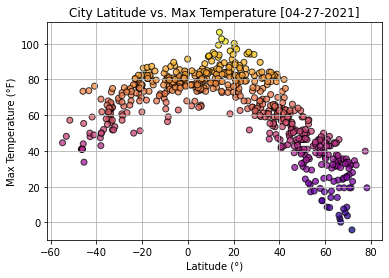

In [149]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='royalblue', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Max Temperature [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Max Temperature (°F)")

## Show grid
plt.grid()
# Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

## Latitude vs. Humidity Plot

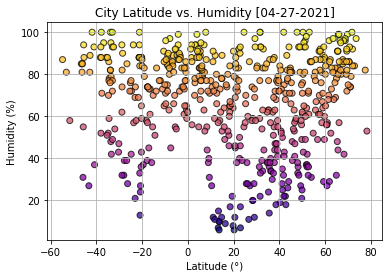

In [150]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='orange', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Humidity [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Humidity (%)")

## Show grid
plt.grid()
## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

## Latitude vs. Cloudiness Plot

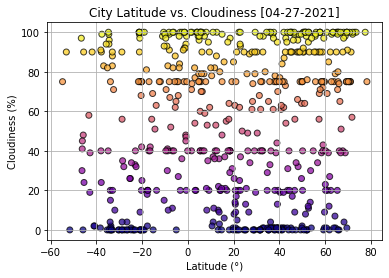

In [151]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='purple', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Cloudiness [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Cloudiness (%)")

## Show grid
plt.grid()
## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

## Latitude vs. Wind Speed Plot

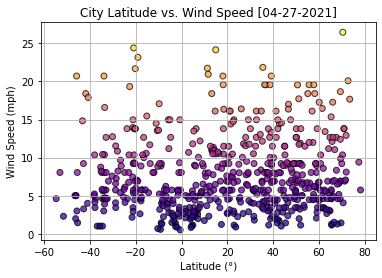

In [152]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='green', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Wind Speed [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Wind Speed (mph)")

## Show grid
plt.grid()
## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

## Linear Regression

In [156]:
## SEPARATE NORTHERN & SOUTHERN HEMISPHERES (get .loc booleans)
## Northern Hemisphere (greater than or equal to 0 degrees latitude)
north_hemisphere = clean_city_data["Lat"] >= 0
## Southern Hemisphere (less than 0 degrees latitude)
south_hemisphere = clean_city_data["Lat"] < 0

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression